<a href="https://colab.research.google.com/github/avineses/PUC_DBDC/blob/main/Clase7/Clase7_1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.” 

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [ ]:
# pnorm()
#?pnorm
pnorm(160, mean = 171.8, sd = 5)
# Hay un 0.9% de probabilidad de que la persona mida menos de 1.60 mts.



[1] 0.009137468

In [ ]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [ ]:
#P(estatura > 160) = 1- P(estatura <= 160)
1-pnorm(160, mean = 171.8, sd = 5)

#NOTA 
# lower.tail 
pnorm(160, mean = 171.8, sd = 5, lower.tail = F)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [ ]:
# P(est <= 190) - P(est <= 180) = P(180 <= est <= 190)
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)

# Hay un 5% de probabilidad de encontrar una persona con estatura entre 180 y 190.

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [ ]:
qnorm(0.9, mean =  171.8, sd = 5)
# Cómo interpretamos este valor
# El 90% de las personas de género masculino,en chile, tiene una estatura menor o igual a 178.2 cms.

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [ ]:
# estaturas
set.seed(666)
estaturas <- rnorm(1000, mean = 171.8, sd = 5)

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

In [ ]:
## NOTA
# dnorm() evalúa la función de densidad en el argumento dado
dnorm(1.2, mean = 0, sd = 1) # evaluación de la densidad en el punto 1.2, de una distrib. normal con media 1 y sd 0.

[1] 0.1941861

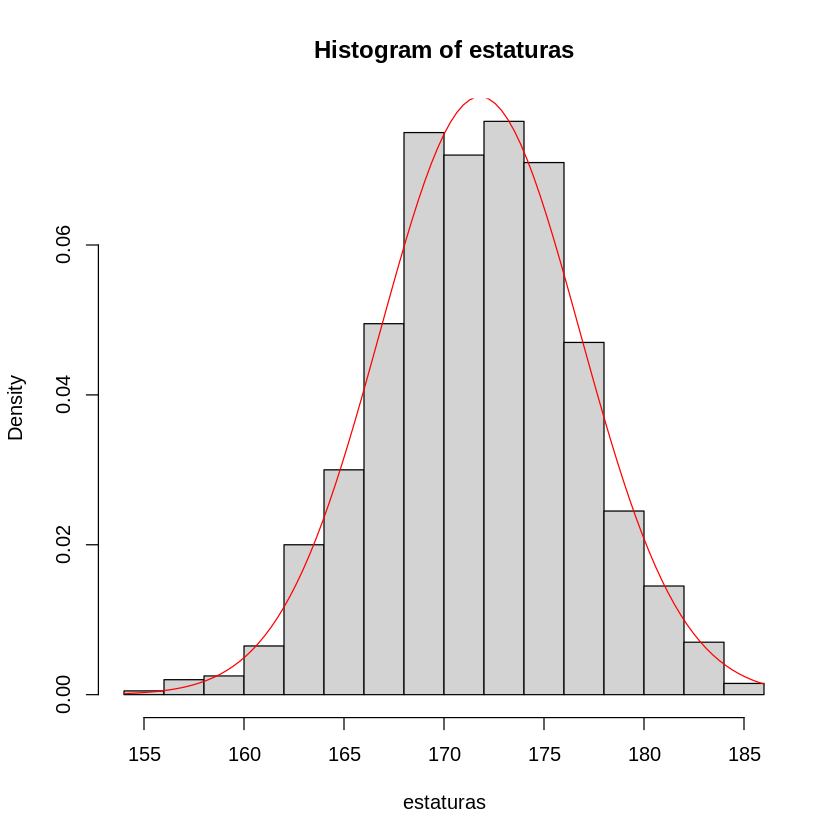

In [ ]:
hist(estaturas,freq = F)
curve(dnorm(x, mean = 171.8, sd = 5), add = T, col = "red")

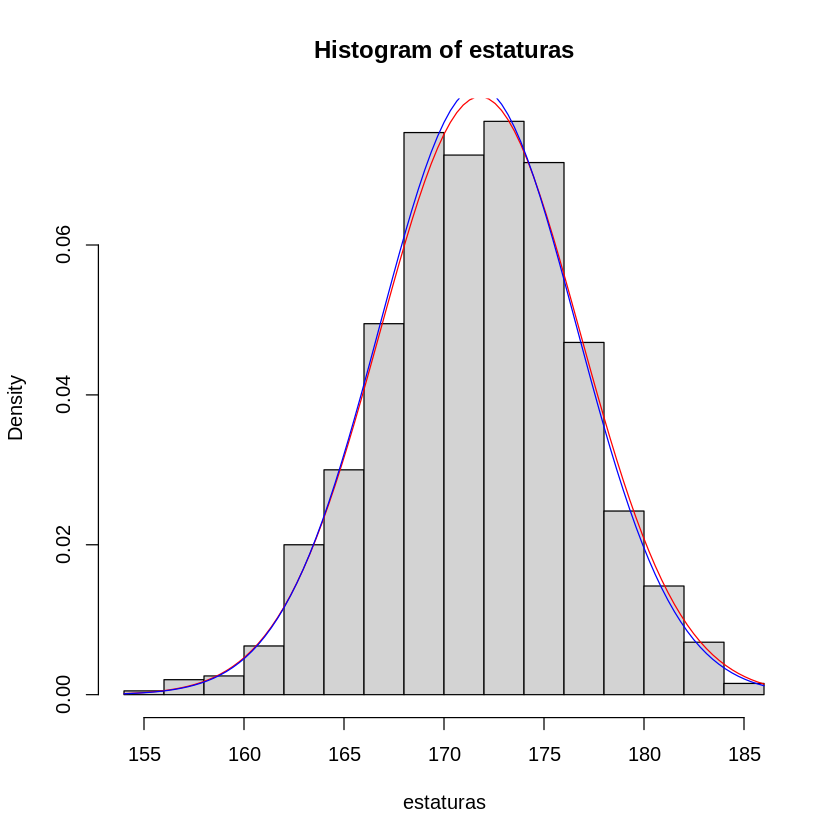

In [ ]:
mu_est <- mean(estaturas)
sd_est <- sd(estaturas)

hist(estaturas,freq = F,breaks  =15)
curve(dnorm(x, mean = 171.8, sd = 5), add = T, col = "red")
curve(dnorm(x, mean = mu_est, sd = sd_est), add = T, col = "blue")

In [ ]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.



In [ ]:
?hist

In [ ]:
# Podemos realizar lo mismo con ggplot, aunque con un poco de dificultad adicional
df <-data.frame(est = estaturas)
head(df)

,est
,<dbl>
1,175.5666
2,181.8718
3,170.0243
4,181.9408
5,160.7156
6,175.5920


#NOTA: Funciones en R



In [ ]:
g <- function(x,y){
  aux = x*y
  return(aux+10)
}

In [ ]:
g(1,2)

[1] 12

In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




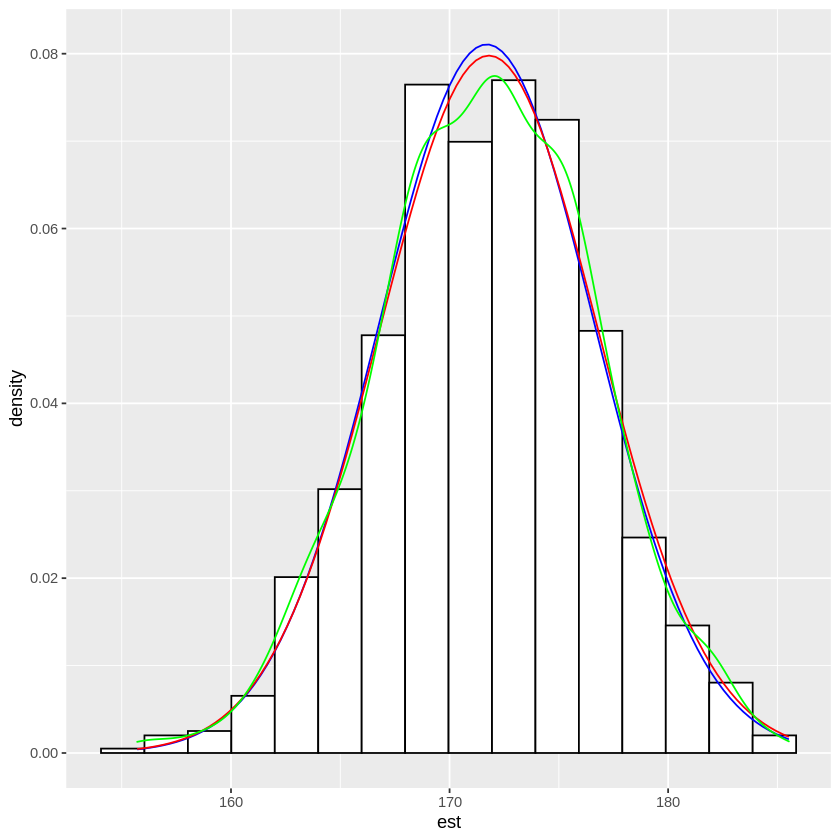

In [ ]:
df %>% 
  ggplot() + 
  aes(x = est) +
  geom_histogram(
    bins = 16,
    fill = "white",
    color = "black",
    aes(y = ..density..)) +
  stat_function( fun = function(x){
    dnorm(x, mean = mu_est, sd = sd_est)
  },col = "blue") + 
  stat_function( fun = function(x){
    dnorm(x, mean = 171.8, sd = 5)
  },col = "red") +
  geom_density(col = "green")

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que 
 al menos 30  personas compren el artículo ofrecido?

In [ ]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

# Observaciòn sobre P(X >= 30)
1- pbinom(29, size = 100, prob = 0.2) # 1-P(X <= 29) =  P(X >= 30)
pbinom(29, size = 100, prob = 0.2, lower.tail = F) # o equivalentemente




[1] 0.01124898

[1] 0.01124898

In [ ]:
 pbinom(3, size = 100, prob = 0.2)
 dbinom(0, size = 100, prob = 0.2) + dbinom(1, size = 100, prob = 0.2)+dbinom(2, size = 100, prob = 0.2)+dbinom(3, size = 100, prob = 0.2)

[1] 5.82987e-07

[1] 5.82987e-07

In [ ]:
# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(30, size = 100, prob = 0.2) 
# otra alternativa
(pbinom(30, size = 100, prob = 0.2) - pbinom(29, size = 100, prob = 0.2) )






[1] 0.005189643

[1] "0.519 %"

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [ ]:

# size = 8 
# prob = 0.7

1-pbinom(5, size = 8, prob = 0.7)

#Un 55% de prob de que 6 o más casas tengan tv.

[1] 0.5517738

## Lanzando una moneda 
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [ ]:
#size = n = 14, y prob = p = 0.5 ?

dbinom(4,size = 14, prob = 0.5) #6% de prob de obtener 4 caras

pbinom(9,size = 14, prob = 0.5,lower.tail = F)# 9% de obtener al menos 10 caras

[1] 0.06109619

[1] 0.08978271

  
**b)** Si se repite el experimento 5 veces. ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?  Utillice la función rbinom para simular el experimento 1000 veces.

In [ ]:
# simulamos un experimento binomial
set.seed(666)
N <- 1000
lanzamientos <- rbinom(N, size = 14, prob = 0.5)

In [ ]:
lanzamientos

[1]  8  5 11  5  6  8 11  7  3  6  8  3  5  5  5  9  4  9  7  7 11  7  4  5
  [25]  9  6  4  8  7  9  7  7  9  7  8  7  6  9  8  7  6  7  5 11  9  8  6  8
  [49]  7 11  4  4  5  8  4  8  5  9  4  4  8  9  6  8 10  6  6 10  7 10  7  6
  [73]  8  9  4  9  7  4 11 10  8  8  6  9  6  8 10  5  8  9  5  4  6  7  7  5
  [97]  8  7  8  8  7  6  9  7  6 11  6  6  6  8  5  6  7  7  6  9  8  6  9  9
 [121]  5  7  5  9  5  8 11  3  8  5  6  7  7 10  8  6 10  7  7  6  6  4  7  8
 [145]  8  5  7  5  5  4  7  6  6  7  2  8  6  5  6  4 10  5  9  8  6 10  5  6
 [169]  7  9  9  8  8  6 10  7  7  9  5  8  6  5  5  6  8  7  8  7  5  7  8  8
 [193]  8  4  6  6  7  6  7  8  5  6  4  6 11  8  9  7  5  6  8  8  6  9  8  5
 [217]  5  6  6  7  5  7  7  8  9  5  4  6  6  6  9  5  4  9  6  8  7  8  3  7
 [241]  6  8  9  8  8  8  9  8  7  8  9 10  7 10  6  8  8 10  5  5  8  7  8  4
 [265]  6  8  5  8  6  9  8  6  7  9  1  9  4  6  9  9 12  7  5 10  8  8 10  7
 [289]  8  6  5  6  8  7 10 10  7  9  7  8  4  5  4  7  7  9  7  9  4  8  8  7
 [313]  9  9 10  7  8  8  5 11  7  7  9  9  6  6 11  7  5  9  8  8  4  7 10 11
 [337]  8  4  6  7  6  7  7  7  9  5  7  6  6  5  6  8  6  8  2  9 10  4  7  6
 [361]  7  9  2  6  4  7  9  8  7  8  9  8  7  8  8  6  8  2  6  8  9 11  3  7
 [385]  3  7  9  7  9  6  9  9  6 10  5  6  7  6  8  6 11  9  9  6  7  6  9  9
 [409]  8  8  7  6 11 11 10  9  9  6  7  6  8  7  8  6  8  7  6  5  6  5  8  5
 [433]  7  9  8  6  6  7  6  6  5  7  7  5  9  9  4  8  9 10  7  9 10  7  7  8
 [457]  7  6  7 10  7  8  6  6  8  7  9  4  8  5  7  7  4  9  7  5  5  7  6  9
 [481]  8  6  4  8  5  7  6  6  6  7  7 10  8  6  8  6  4  5  9  6  6  5  8  7
 [505]  7  8  6  8  9  6  5  8 10  6  4  8  6  8  8  9  4  8 10  6  6  7  8  6
 [529]  6  7  4  8  8  7  9  7  6  9  6  4  7  6  3  5  5  6  7  8  4  6  6  8
 [553]  7  8  8  7 10 10  7  6 10  5  5  8  7  6  8 10  2  8  7  9  5  9  5  9
 [577]  9  7  6  8  6 12  6  7  5  7  4  5  6  8  5 10  7  7  9  8  4  6  6  6
 [601]  8  8  7  6  6  8  6  6  4  5  7  7  8 12 10  4  7  6 10  6  6  8  4  5
 [625]  6  8  5  8  6  4  9  7 10  6  6  9  4  6  5  4  4  8  7  8  6  7  5  6
 [649] 10  4  7  7  9  6  8  9  6  6  8  5  9  8 10  8  7  8  9  6  6  9  7  7
 [673]  9  6  2  5  9  9  7  6  6  8  5  7 10  8  8  5  8  9  8  5  8 10  9  8
 [697]  6 11  7  6  7  5  7  9  7  8  5  7  7  7  5  6  7  7 11  8  6  7  5  7
 [721]  6 10  8  6  9 11  7  7  6 12  7  9  4  5 11  7  5  5  8 10  7 11  8  6
 [745]  8  9  8  7  8  9  6  8  6  5  4  6  8  8  4  6  6  8  5  6  7  6  5  7
 [769]  3  8  6 11  8  8  6  6  6  7 11  6  7  8  7  4  3  5  8  8  9  4  9  7
 [793]  9 10  4  9  6  7 10  3  6  9  9  6  8  9  4  6  6  7  9  7  8  9  5  7
 [817]  9  8  7  8  6  9  8  5  6  6  9  5  8  8  9  7  9  4 11  9  4  8  7  9
 [841]  7  9  6 10  8  9  5  6  9  3  9  5  6  5  7  7  7  3  9  6  8  8  7  6
 [865]  7  7  7  5  6  7  6  4  8  9  4  6  8 10  7  7  8  6  8  7  5  9  6  6
 [889]  7  8  7 11  7  8  9  6  9  9  5  6  5  7  5  5  9  8  7  4  6  5  6 10
 [913] 10  7 11  8  6  9  6  4  6  8 10  3  8  8  8  6  7  7  5  5  9  7  5  7
 [937]  5  4  6  4 10 10  5  8  7  6  4  5  6  8  5  9  5  7  8  4  7  5  6  7
 [961]  8  5  8  7  8  8  8  4  4  4  9  5  6  5  5  3  7  5  9  7 10  8  8  5
 [985]  7  9  7  7  7  5  5  9  9  7  7  6 11 10 10  6

In [ ]:
mean(lanzamientos)

[1] 7.015

In [ ]:
# podemos construir un gráfico de barras con los conteos
df <- data.frame(caras   = lanzamientos)
head(df)


,caras
,<int>
1,8
2,5
3,11
4,5
5,6
6,8


In [ ]:
experimentos <- df %>%
          group_by(caras) %>%
          summarise(count = n(),
                    freq_obs = n()/N) %>%
          mutate(freq_teorica = dbinom(caras,size = 14,prob = 0.5))
experimentos

caras,count,freq_obs,freq_teorica
<int>,<int>,<dbl>,<dbl>
1,1,0.001,0.0008544922
2,6,0.006,0.0055541992
3,14,0.014,0.0222167969
4,67,0.067,0.0610961914
5,117,0.117,0.1221923828
6,195,0.195,0.1832885742
7,197,0.197,0.2094726563
8,189,0.189,0.1832885742
9,129,0.129,0.1221923828


In [ ]:
# En este ejemplo no aparecen el 0, 13 y 14. Así que los añadiremos manualmente

df_aux <- data.frame(caras = c(0,13,14),
           count = 0,
           freq_obs = 0,
           freq_teorica = dbinom(c(0,13,14),size = 14, prob = .5))
df_aux

caras,count,freq_obs,freq_teorica
<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,6.103516e-05
13,0,0,8.544922e-04
14,0,0,6.103516e-05


In [ ]:
experimentos <- bind_rows(experimentos,df_aux)

In [ ]:
dbinom(c(0,13,14),size = 14, prob = .5)

[1] 6.103516e-05 8.544922e-04 6.103516e-05

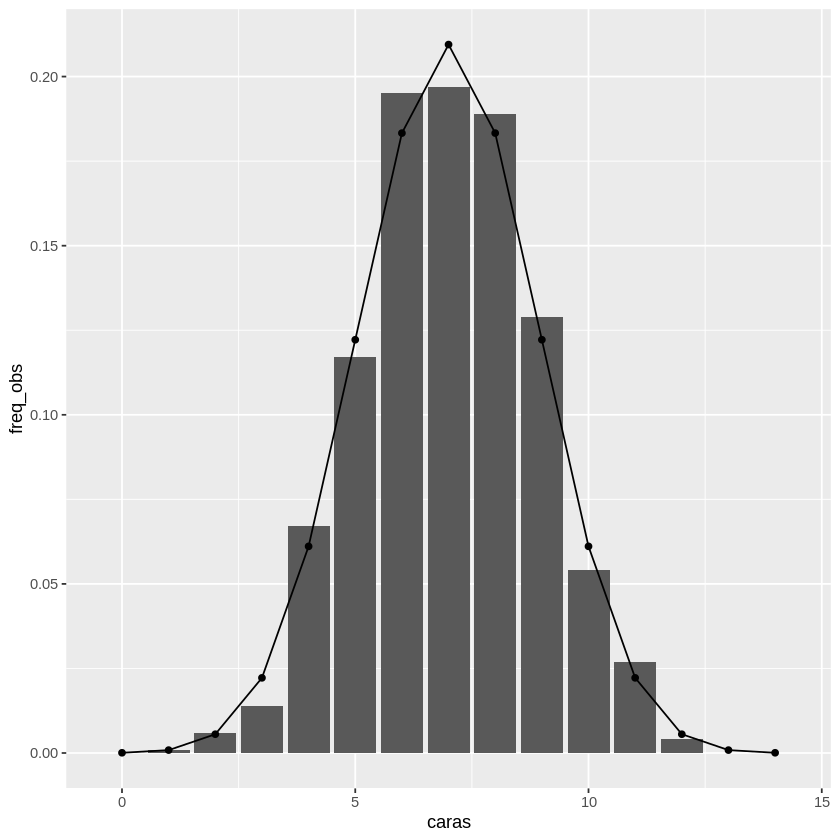

In [ ]:
# gráfio ggplot 

experimentos %>% 
          ggplot() +
          aes(x = caras,y = freq_obs) +
          geom_bar(stat = "identity") +
          geom_point(aes(y = freq_teorica)) +
          geom_line(aes(y = freq_teorica))



In [ ]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.


# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

** P5. ** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio. 
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [ ]:
# La tasa de éxito en una dist. poisson es el parámetro lambda 
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos






**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [ ]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

